# we can run this on Colab!

# 1. Reading cleaned csv file

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
raw = pd.read_csv("qualified_vacany_pure_filled.csv")

In [3]:
raw.rename(columns = {"Unnamed: 0":"timeFrame"}, inplace=True)

# 2. Model Building & Training

In [4]:
carpark_id_list = raw.drop(["timeFrame", "time", "day_of_week",	"minute",	"hour"], axis = 1)

In [5]:
carpark_id_list = carpark_id_list.columns.to_list()

# Train four different Models for each of the carpark


---


- Dummy (mean)
- Linear Regression
- Decision Tree Regressor
- Random Forest Regressor

In [6]:
# Data split
from sklearn.model_selection import train_test_split

# Importing models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor

dr_list = []
lr_list = []
dt_list = []
rf_list = []

X_test_list = []
y_test_list = []

# i) Train Test Split
for carpark_id in carpark_id_list:
  X_train, X_test, y_train, y_test = train_test_split(raw[["day_of_week", "hour", "minute"]], raw[carpark_id], random_state = 101)
  X_test_list.append(X_test)
  y_test_list.append(y_test)

# ii) Instantiation & fitting
  dr = DummyRegressor()
  dr.fit(X_train, y_train)

  lr = LinearRegression()
  lr.fit(X_train, y_train)
  
  dt = DecisionTreeRegressor()
  dt.fit(X_train, y_train)
  
  rf = RandomForestRegressor()
  rf.fit(X_train, y_train)
  
  dr_list.append(dr)
  lr_list.append(lr)
  dt_list.append(dt)
  rf_list.append(rf)

# 3. Evaluation

### We can look at a single car park by setting carpark_id

- The graph will show the RMSE of using the corresponding models and its RMSE-mean ratio
- remark: In general, RMSE-mean ratio ~10% means good perforamance

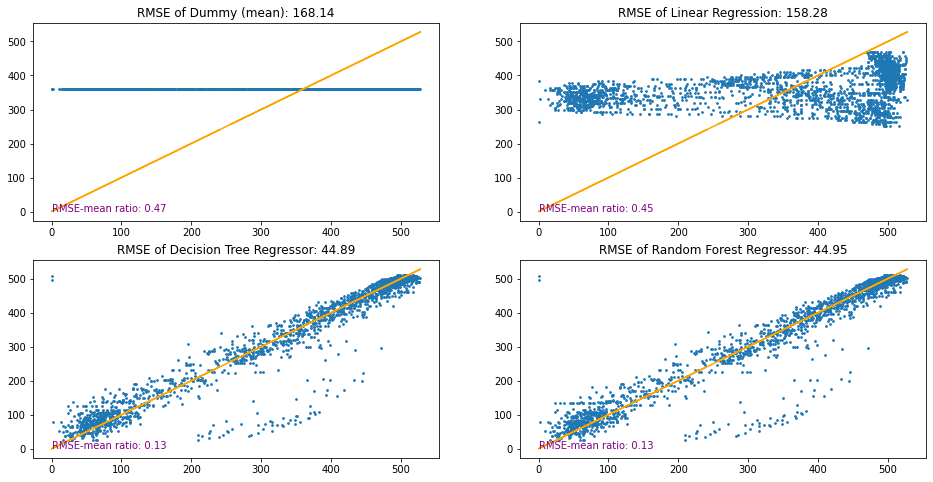

In [8]:
from sklearn.metrics import mean_squared_error

# Look at one single car park
carpark_id = 'tdcp2' # alternative: carpark_id = carpark_id_list[int]

x = carpark_id_list.index(carpark_id) # get the corresponding id

prediction_list = []
ratio_list = []

# Mean of the test data (in # of vavancy)
y_mean = y_test_list[x].mean()

model = dr_list[x]
prediction_list.append(model.predict(X_test_list[x]))
ratio_list.append(np.sqrt(mean_squared_error(y_test_list[x], model.predict(X_test_list[x]))) / y_mean)

model = lr_list[x]
prediction_list.append(model.predict(X_test_list[x]))
ratio_list.append(np.sqrt(mean_squared_error(y_test_list[x], model.predict(X_test_list[x]))) / y_mean)

model = dt_list[x]
prediction_list.append(model.predict(X_test_list[x]))
ratio_list.append(np.sqrt(mean_squared_error(y_test_list[x], model.predict(X_test_list[x]))) / y_mean)

model = rf_list[x]
prediction_list.append(model.predict(X_test_list[x]))
ratio_list.append(np.sqrt(mean_squared_error(y_test_list[x], model.predict(X_test_list[x]))) / y_mean)

fig = plt.figure(figsize=(16,8))

# Import metric, here we will use mean_squared_error

name = ["Dummy (mean)", "Linear Regression", "Decision Tree Regressor", "Random Forest Regressor"]
for i in range(4):
  ax = fig.add_subplot(2, 2, i+1)
  ax.plot(y_test_list[x], y_test_list[x], color="orange") 
  ax.scatter(y_test_list[x], prediction_list[i], s=3)
  ax.title.set_text("RMSE of %s: %.2f"%(name[i], np.sqrt(mean_squared_error(y_test_list[x], prediction_list[i]))))
  ax.text(0, 0, ("RMSE-mean ratio: %.2f")%(ratio_list[i]),color = "purple")

# Percentage of Best Performance
- Among 4 different models we chosen, count the number of time of that model having the best performance (lowest RMSE)

In [9]:
dr_count = 0
lr_count = 0
dt_count = 0
rf_count = 0

for x in range(94):
  
  prediction_list = []
  
  model = dr_list[x]
  prediction_list.append(model.predict(X_test_list[x]))

  model = lr_list[x]
  prediction_list.append(model.predict(X_test_list[x]))

  model = dt_list[x]
  prediction_list.append(model.predict(X_test_list[x]))

  model = rf_list[x]
  prediction_list.append(model.predict(X_test_list[x]))

  for i in range(4):
    smse = np.sqrt(mean_squared_error(y_test_list[x], prediction_list[i]))
    if i == 0:
      index = 0
      min = smse
    if (smse <= min):
      index = i
      min = smse

  if index == 0:
    dr_count += 1
  elif index == 1:
    lr_count += 1
  elif index == 2:
    dt_count += 1
  else:
    rf_count += 1

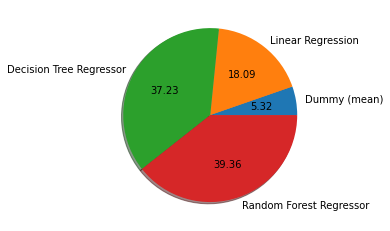

In [10]:
y = [dr_count, lr_count, dt_count, rf_count]
plt.pie(y, labels=name, shadow = True, autopct='%.2f')
plt.show()

# Average RMSE-mean ratio for each model
##### However, it is biased by some extreme outliers, it can be only used reference

In [11]:
prediction_list1 = [] # dummy
prediction_list2 = [] # linear Regression
prediction_list3 = [] # Decision Tree
prediction_list4 = [] # Random Forest

for x in range(94):
  y_mean = y_test_list[x].mean()

  model = dr_list[x]
  prediction_list1.append(round(np.sqrt(mean_squared_error(y_test_list[x], model.predict(X_test_list[x]))) / y_mean,2))

  model = lr_list[x]
  prediction_list2.append(round(np.sqrt(mean_squared_error(y_test_list[x], model.predict(X_test_list[x]))) / y_mean,2))

  model = dt_list[x]
  prediction_list3.append(round(np.sqrt(mean_squared_error(y_test_list[x], model.predict(X_test_list[x]))) / y_mean,2))

  model = rf_list[x]
  prediction_list4.append(round(np.sqrt(mean_squared_error(y_test_list[x], model.predict(X_test_list[x]))) / y_mean,2))
  
  # This code is to prevent x to be NaN (y_mean = 0)
  prediction_list1 = [x for x in prediction_list1 if x == x]
  prediction_list2 = [x for x in prediction_list2 if x == x]
  prediction_list3 = [x for x in prediction_list3 if x == x]
  prediction_list4 = [x for x in prediction_list4 if x == x]
print(sum(prediction_list1)/len(prediction_list1))
print(sum(prediction_list2)/len(prediction_list2))
print(sum(prediction_list3)/len(prediction_list3))
print(sum(prediction_list4)/len(prediction_list4))

<ipython-input-11-e99a64df6d3e>:10: RuntimeWarning: invalid value encountered in double_scalars
  prediction_list1.append(round(np.sqrt(mean_squared_error(y_test_list[x], model.predict(X_test_list[x]))) / y_mean,2))
<ipython-input-11-e99a64df6d3e>:13: RuntimeWarning: invalid value encountered in double_scalars
  prediction_list2.append(round(np.sqrt(mean_squared_error(y_test_list[x], model.predict(X_test_list[x]))) / y_mean,2))
<ipython-input-11-e99a64df6d3e>:16: RuntimeWarning: invalid value encountered in double_scalars
  prediction_list3.append(round(np.sqrt(mean_squared_error(y_test_list[x], model.predict(X_test_list[x]))) / y_mean,2))
<ipython-input-11-e99a64df6d3e>:19: RuntimeWarning: invalid value encountered in double_scalars
  prediction_list4.append(round(np.sqrt(mean_squared_error(y_test_list[x], model.predict(X_test_list[x]))) / y_mean,2))
<ipython-input-11-e99a64df6d3e>:10: RuntimeWarning: invalid value encountered in double_scalars
  prediction_list1.append(round(np.sqrt(

0.4911956521739129
0.4677173913043477
0.32402173913043475
0.32402173913043475


In [14]:
import json
import requests

basic_info_url = "https://resource.data.one.gov.hk/td/carpark/basic_info_all.json"
basic_info = json.loads(requests.get(basic_info_url).content)
car_park_ref = pd.DataFrame.from_dict(basic_info["car_park"])[["park_id", "name_en", "district_en"]]

In [15]:
# The below lists are pre-made by another notebook
Central_Western = ['tdcp2', 'tdcp5', 'tdcp7', 'tdcp8']
Eastern = ['tdcp9', 'tdc25p42', 'tdc25p41', 'tdc25p40', 'tdc6p21', 'tdc39p1', 'tdc42p1', 'tdc41p1', 'tdstt33']
Islands = ['tdc2p1', 'tdc47p1', 'tdstt34']
Kowloon_City = ['tdc25p37', 'tdc27p1']
Kwai_Tsing = ['tdcp6']
Kwun_Tong = ['tdc43p1', 'tdstt31', 'tdc6p15', 'tdc33p1', 'tdc33p2']
North = ['tdstt10', 'tdstt24', 'tdstt39'] 
Sai_Kung = ['tdstt37', 'tdstt25', 'tdstt29', 'tdstt40', 'tdstt41', 'tdstt42', 'tdstt44'] 
Sha_Tin = ['tdstt2p2', 'tdstt38', 'tdstt4p1', 'tdstt11', 'tdc29p1', 'tdc32p4', 'tdc32p6', 'tdstt32'] 
Sham_Shui_Po = ['tdc48p2', 'tdc48p1', 'tdc6p19', 'tdc32p3'] 
Southern = ['tdcp10', 'tdc25p38', 'tdc6p20', 'tdc32p1', 'tdc32p2', 'tdc36p1', 'tdc36p2', 'tdc41p2', 'tdc44p2', 'tdc44p3', 'tdstt35'] 
Tai_Po = ['tdstt5p1', 'tdstt7p1', 'tdc6p6', 'tdc9p3', 'tdstt23'] 
Tsuen_Wan = ['tdcp3', 'tdstt46'] 
Tuen_Mun = ['tdstt3p1', 'tdc43p2', 'tdstt15', 'tdstt17', 'tdstt21', 'tdstt26', 'tdstt27', 'tdstt28', 'tdc38p2', 'tdstt36', 'tdc25p43'] 
Wan_Chai = ['tdcp11', 'tdc1p5', 'tdc1p4', 'tdc1p3', 'tdc1p2', 'tdc1p1', 'tdc38p1'] 
Wong_Tai_Sin = ['tdcp12', 'tdstt22'] 
Yau_Tsim_Mong = ['tdc17p1', 'tdstt30', 'tdc17p3', 'tdc17p2', 'tdstt19', 'tdc44p1'] 
Yuen_Long = ['tdstt12', 'tdc6p17', 'tdc32p5', 'tdstt43']

In [16]:
import datetime
def prediction(District, date, time): 
  ### 
  # District: List, contains car park id in the destrict
  # date: String, "DD-MM-YYYY" (e.g. "20-06-2021")
  # time: String, "HH:MM" (e.g. "13:15")
  ###
  year = int(date[6:])
  month = int(date[3:5])
  day = int(date[:2])
  week_of_date = datetime.datetime(year, month, day).weekday()
  input = np.array([week_of_date, time[:2], time[4:6]]).reshape(1, -1)
  vacancy_list = {}
  for carpark in District:
    vacancy_list[car_park_ref[car_park_ref["park_id"]==carpark]["name_en"].values[0]] = int(dt_list[carpark_id_list.index(carpark)].predict(input))

  final = dict(sorted(vacancy_list.items(), key=lambda item: item[1],reverse=True))
  for pair in final.items():
    print("Carpark Name: %s\nVacancy: %d\n"%(pair[0], pair[1]))

Please enter a valid date in yyyy-mm-dd HH:MM

Please pick your district from: Central_Western, Eastern, Islands, Kowloon_City, Kwai_Tsing, Kwun_Tong, North, Sai_Kung, Sha_Tin, Sham_Shui_Po, Southern, Tai_Po, Tsuen_Wan, Tuen_Mun, Wan_Chai, Wong_Tai_Sin, Yau_Tsim_Mong, Yuen_Long

In [20]:
prediction(Yau_Tsim_Mong, "20-06-2021", "13:15")

Carpark Name: Hoi Ting Road
Vacancy: 63

Carpark Name: Zone E Car Park
Vacancy: 61

Carpark Name: PSO Car Park
Vacancy: 34

Carpark Name: WKCD Xiqu Centre Car Park
Vacancy: 21

Carpark Name: Kowloon Park
Vacancy: 7

Carpark Name: Junction of Hoi Wang Road and Lai Cheung Road
Vacancy: 2

